Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 4, 1, 3, 1, 5, 5, 3, 6, 10, 4, 11, 3, …
$ Glucose                  <dbl> 85, 115, 110, 103, 126, 97, 117, 109, 88, 92,…
$ BloodPressure            <dbl> 66, 0, 92, 30, 88, 66, 92, 75, 58, 92, 78, 60…
$ SkinThickness            <dbl> 29, 0, 0, 38, 41, 15, 0, 26, 11, 0, 31, 33, 0…
$ Insulin                  <dbl> 0, 0, 0, 83, 235, 140, 0, 0, 54, 0, 0, 192, 0…
$ BMI                      <dbl> 26.6, 35.3, 37.6, 43.3, 39.3, 23.2, 34.1, 36.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.134, 0.191, 0.183, 0.704, 0.487, 0.3…
$ Age                      <dbl> 31, 29, 30, 33, 27, 22, 38, 60, 22, 28, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

#### Outcome would be the most suitable variable for an outcome in a logistic regression, since the outcome is binary meaning the person either has diabetes or does not.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

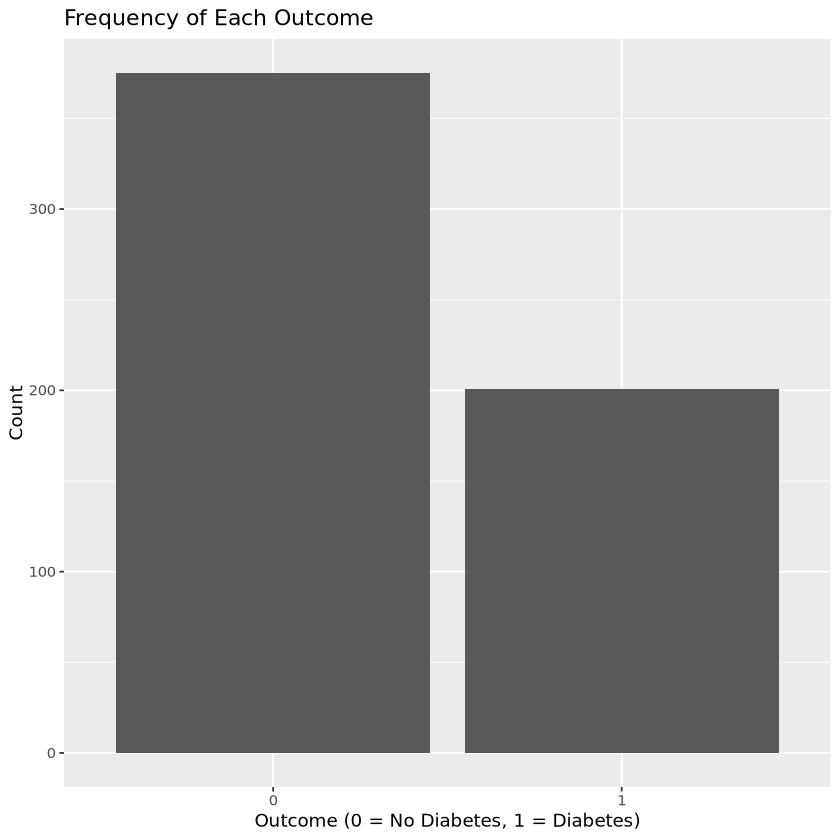

In [6]:
ggplot(diabetes_train, aes(x = as.factor(Outcome))) +
  geom_bar() +
  labs(title = "Frequency of Each Outcome",
       x = "Outcome (0 = No Diabetes, 1 = Diabetes)",
       y = "Count")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** There is not a balanced outcome. No Diabetes is double Diabetes.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [7]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

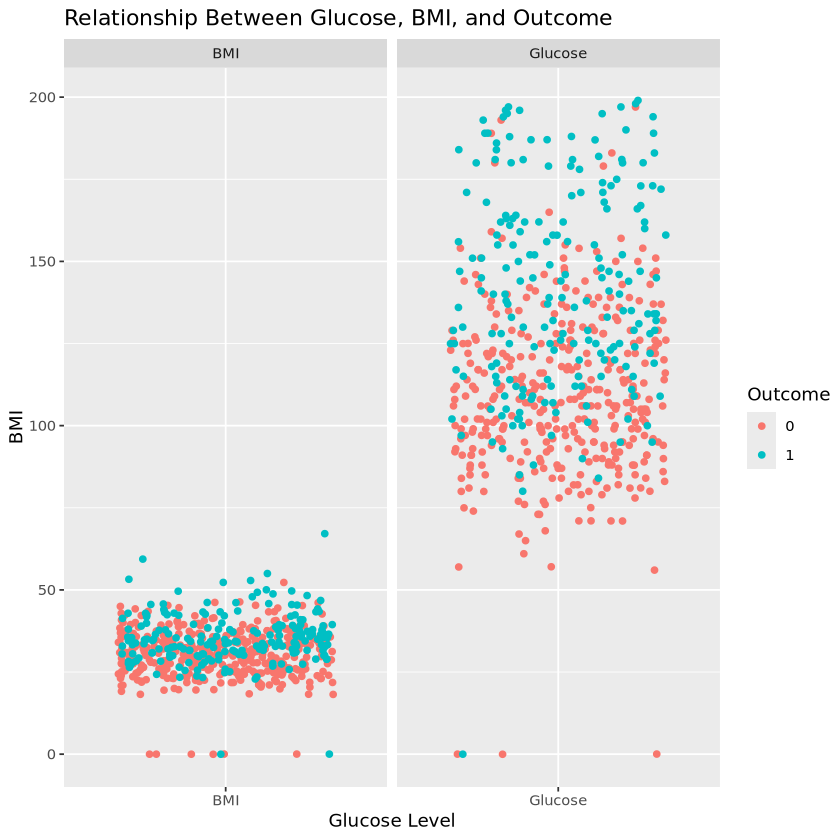

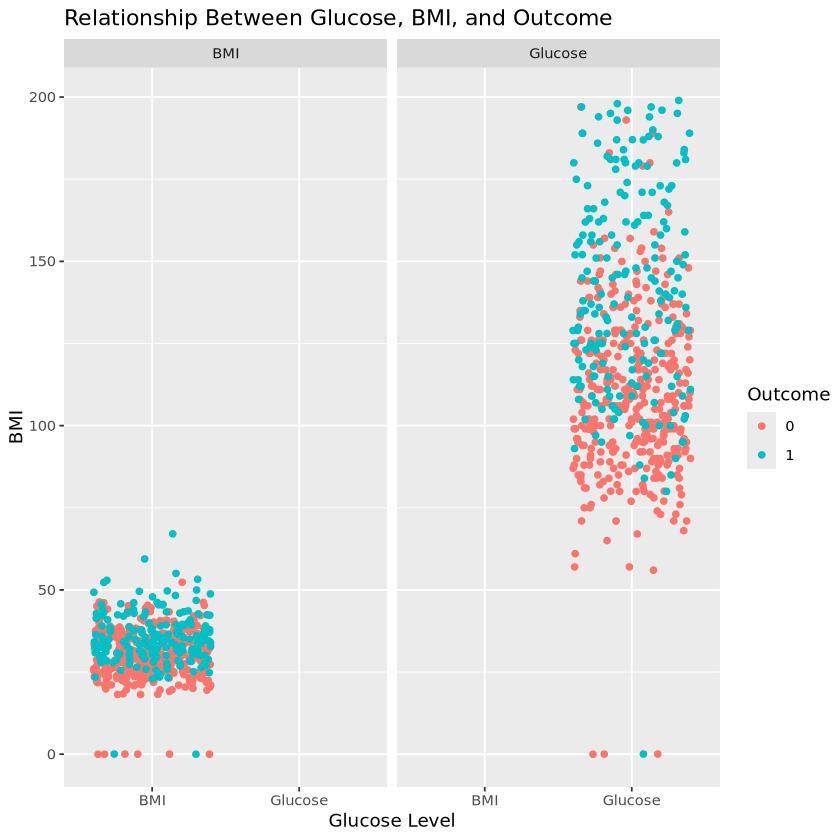

In [10]:
ggplot(plot_df, aes(x = name, y = value, color = as.factor(Outcome))) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship Between Glucose, BMI, and Outcome",
       x = "Glucose Level",
       y = "BMI",
       color = "Outcome")


ggplot(plot_df, aes(x = name, y = value, color = as.factor(Outcome))) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2) +
  labs(title = "Relationship Between Glucose, BMI, and Outcome",
       x = "Glucose Level",
       y = "BMI",
       color = "Outcome")


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** When you remove the 'scales = 'free_x'' argurment, the graph will show BMI and Glucose for each the 'BMI' and 'Glucose' charts, making the data points smaller and harder to read. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [13]:
log_reg_model <- glm(Outcome ~ name + value, data = plot_df, family = binomial)

summary(log_reg_model)



Call:
glm(formula = Outcome ~ name + value, family = binomial, data = plot_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.145358   0.160342  -13.38   <2e-16 ***
nameGlucose -4.311089   0.401835  -10.73   <2e-16 ***
value        0.046897   0.004068   11.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1490.2  on 1151  degrees of freedom
Residual deviance: 1292.3  on 1149  degrees of freedom
AIC: 1298.3

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [15]:
diabetes_test_wPred <- augment(log_reg_model, new_data = diabetes_test, type.predict = "response")

head(diabetes_test_wPred)



Outcome,name,value,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Glucose,85.0,0.07797502,-0.4029466,0.002752979,1.060931,7.803493e-05,-0.4035024
0,BMI,26.6,0.28948384,-0.8267570,0.001750388,1.060717,2.385531e-04,-0.8274816
0,Glucose,115.0,0.25668556,-0.7702417,0.002430408,1.060754,2.811256e-04,-0.7711794
0,BMI,35.3,0.37992033,-0.9776577,0.001876640,1.060605,3.847124e-04,-0.9785764
0,Glucose,110.0,0.21454336,-0.6949677,0.002515540,1.060799,2.301922e-04,-0.6958434
0,BMI,37.6,0.40563911,-1.0200672,0.001986828,1.060570,4.537911e-04,-1.0210821


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [18]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

ERROR: Error: object 'mod_fit' not found


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**